**Machine Learning for Depression Prediction in University Students**

This project applies a range of machine learning models to predict depression among university students using a structured, self-reported dataset consisting of 27,901 records and 18 features. The core objective is not only to achieve high predictive accuracy but also to identify and rank the most influential variables contributing to depression risk.

Three baseline classifiers are:
Logistic Regression,
Random Forest,
and XGBoost
They were implemented and evaluated.
A stacked ensemble model constructed to combine the strengths of these individual algorithms and produce a unified, robust feature importance ranking.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/maya/Student Depression Dataset.csv')
df.head()

Mounted at /content/drive


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [3]:
# prompt: see the unique values of each feature

for column in df.columns:
  print(f"Unique values for {column}: {df[column].unique()}")

Unique values for id: [     2      8     26 ... 140689 140690 140699]
Unique values for Gender: ['Male' 'Female']
Unique values for Age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
Unique values for City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Unique values for Profession: ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' '

### **Data Prep**

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler


# Drop the 'id' column if it exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Replace missing values with the mode for each column
df.fillna(df.mode().iloc[0], inplace=True)

# Label Encoding for binary categorical features
binary_columns = [
    "Gender",
    "Have you ever had suicidal thoughts ?",
    "Family History of Mental Illness",
    "Depression"
]
for col in binary_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Ordinal Encoding for ordinal categorical features
ordinal_mapping = {
    "Academic Pressure": [0, 1, 2, 3, 4, 5],
    "Study Satisfaction": [0, 1, 2, 3, 4, 5],
    "Job Satisfaction": [0, 1, 2, 3, 4],
    "Sleep Duration": ["Less than 5 hours", "5-6 hours", "7-8 hours", "More than 8 hours", "Others"],
    "Dietary Habits": ["Unhealthy", "Moderate", "Healthy", "Others"],
    "Work/Study Hours": list(range(13)),  # 0 to 12
    "Financial Stress": [1, 2, 3, 4, 5]
}
for col, categories in ordinal_mapping.items():
    df[col] = OrdinalEncoder(categories=[categories]).fit_transform(df[[col]])

# One-hot encoding for nominal features
nominal_columns = ['City', 'Profession', 'Degree']
df = pd.get_dummies(df, columns=nominal_columns)

# Standardization of numerical columns
numerical_columns = ['Age', 'CGPA', 'Work Pressure']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the final processed dataset
print(df.head())

   Gender       Age  Academic Pressure  Work Pressure      CGPA  \
0       1  1.463165                5.0      -0.009777  0.893393   
1       0 -0.371474                2.0      -0.009777 -1.194076   
2       1  1.055467                3.0      -0.009777 -0.425724   
3       0  0.443921                3.0      -0.009777 -1.404862   
4       0 -0.167625                4.0      -0.009777  0.322229   

   Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                 2.0               0.0             1.0             2.0   
1                 5.0               0.0             1.0             1.0   
2                 5.0               0.0             0.0             2.0   
3                 2.0               0.0             2.0             1.0   
4                 3.0               0.0             1.0             1.0   

   Have you ever had suicidal thoughts ?  ...  Degree_MA  Degree_MBA  \
0                                      1  ...      False       False   
1 

In [5]:
df.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,1,1.463165,5.0,-0.009777,0.893393,2.0,0.0,1.0,2.0,1,...,False,False,False,False,False,False,False,False,False,False
1,0,-0.371474,2.0,-0.009777,-1.194076,5.0,0.0,1.0,1.0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,1.055467,3.0,-0.009777,-0.425724,5.0,0.0,0.0,2.0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,0.443921,3.0,-0.009777,-1.404862,2.0,0.0,2.0,1.0,1,...,False,False,False,False,False,False,False,False,False,False
4,0,-0.167625,4.0,-0.009777,0.322229,3.0,0.0,1.0,1.0,1,...,False,False,False,False,False,False,False,False,False,False


Count of Depression yes and depression No

In [6]:
# Count the number of 'yes' and 'no' in the 'Depression' column
depression_counts = df['Depression'].value_counts()

print("Depression Counts:")
depression_counts


Depression Counts:


,count
Depression,
1,16336
0,11565


Correlation Matrix

In [7]:
# prompt: correlation of top 10 variables with highest correlations with depression

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of all variables with 'Depression'
depression_correlation = correlation_matrix['Depression'].sort_values(ascending=False)

# Exclude 'Depression' itself from the top 10
top_10_correlated_variables = depression_correlation[1:11].index.tolist()

# Get the correlation of the top 10 variables with 'Depression'
top_10_correlation = correlation_matrix.loc[top_10_correlated_variables, 'Depression']

print("Top 10 variables with highest correlations with Depression:")
top_10_correlation

Top 10 variables with highest correlations with Depression:


,Depression
Have you ever had suicidal thoughts ?,0.546277
Academic Pressure,0.474835
Financial Stress,0.363464
Work/Study Hours,0.208563
Degree_Class 12,0.130970
Family History of Mental Illness,0.053430
City_Hyderabad,0.038255
City_Ahmedabad,0.033356
CGPA,0.022210
City_Patna,0.018100


Data splitting

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming your target variable is 'Depression' and rest are features
X = df.drop(columns=['Depression'])
y = df['Depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Evaluation Function

In [9]:
def evaluate_model(name, model, X_test, y_test, y_pred, y_proba):
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

### **Baseline Random Forest**

Random Forest Accuracy: 0.832108941049991
Random Forest AUC Score: 0.9052719559161546

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      2343
           1       0.84      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.83      5581
weighted avg       0.83      0.83      0.83      5581



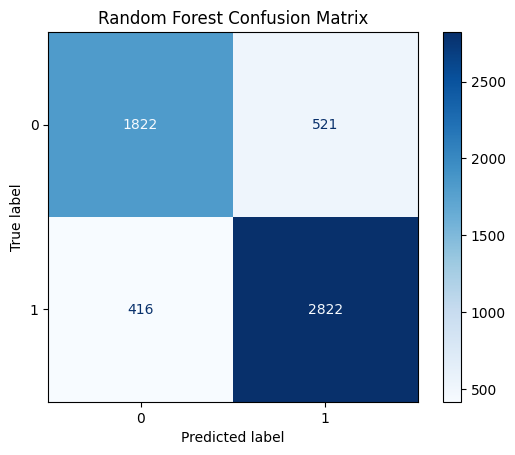

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # For AUC

# Evaluation metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest AUC Score:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

Feature importances from the trained model

                                  Feature  Importance
9   Have you ever had suicidal thoughts ?    0.192840
2                       Academic Pressure    0.151520
11                       Financial Stress    0.094228
1                                     Age    0.071257
4                                    CGPA    0.067146
10                       Work/Study Hours    0.063571
5                      Study Satisfaction    0.040881
8                          Dietary Habits    0.035115
7                          Sleep Duration    0.029428
0                                  Gender    0.014941
12       Family History of Mental Illness    0.013306
90                        Degree_Class 12    0.010269
30                            City_Kalyan    0.005599
57                          City_Srinagar    0.005288
86                             Degree_BCA    0.005282
63                       City_Vasai-Virar    0.005165
81                            Degree_B.Ed    0.005133
52                          

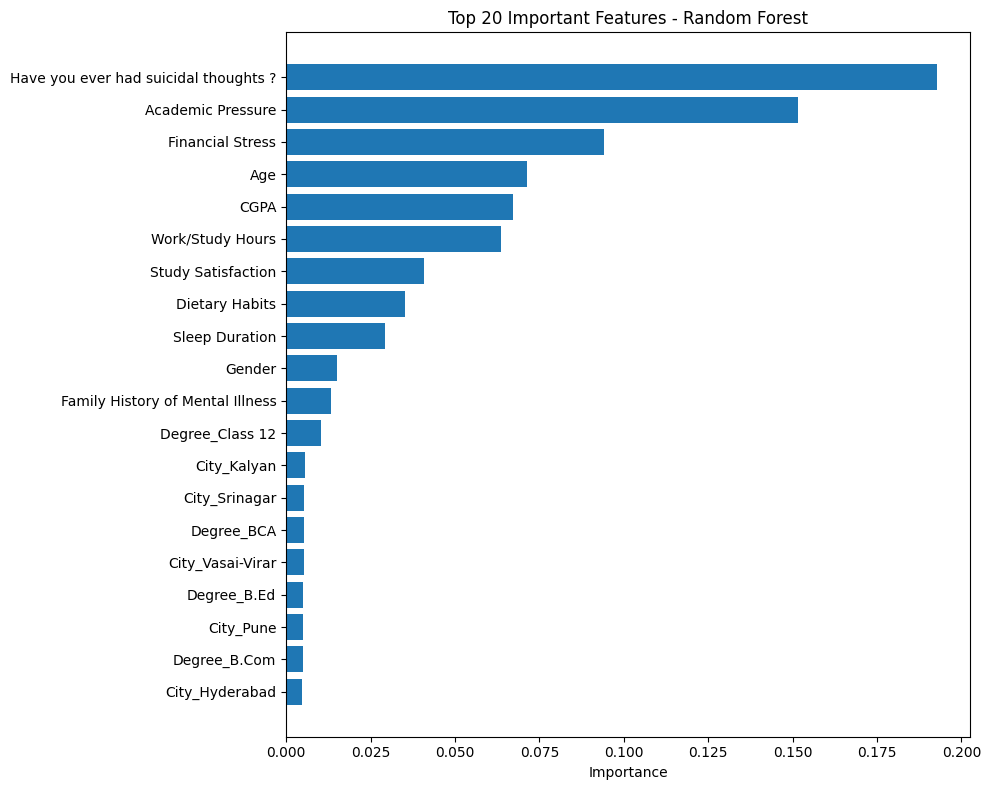

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 20 features
print(rf_importance_df.head(20))

# Plot top 20 important features
plt.figure(figsize=(10, 8))
plt.barh(rf_importance_df['Feature'].head(20)[::-1], rf_importance_df['Importance'].head(20)[::-1])
plt.xlabel('Importance')
plt.title('Top 20 Important Features - Random Forest')
plt.tight_layout()
plt.show()


### **Baseline XGboost**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:57:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost ---
Accuracy: 0.8299587887475363
AUC Score: 0.9053371363374059
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



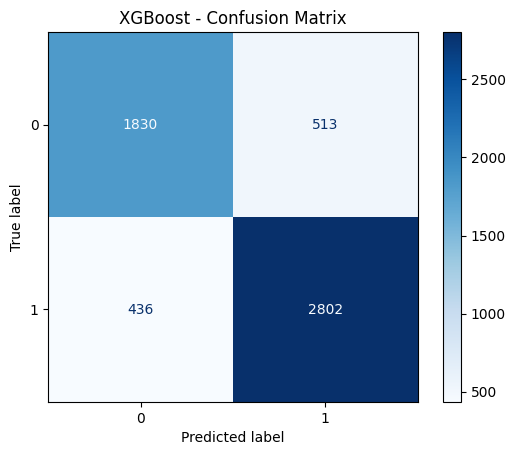

In [12]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

evaluate_model("XGBoost", xgb_model, X_test, y_test, y_pred_xgb, y_proba_xgb)

Feature importance from the model

                                  Feature  Importance
3                                    CGPA       906.0
1                                     Age       571.0
8                        Work/Study Hours       502.0
2                       Academic Pressure       312.0
4                      Study Satisfaction       279.0
9                        Financial Stress       262.0
5                          Sleep Duration       247.0
6                          Dietary Habits       212.0
10       Family History of Mental Illness       110.0
7   Have you ever had suicidal thoughts ?       104.0
0                                  Gender        94.0
32                              City_Pune        28.0
21                            City_Jaipur        26.0
44                            Degree_B.Ed        26.0
42                          Degree_B.Arch        26.0
51                             Degree_BHM        25.0
33                            City_Rajkot        25.0
40                     City_

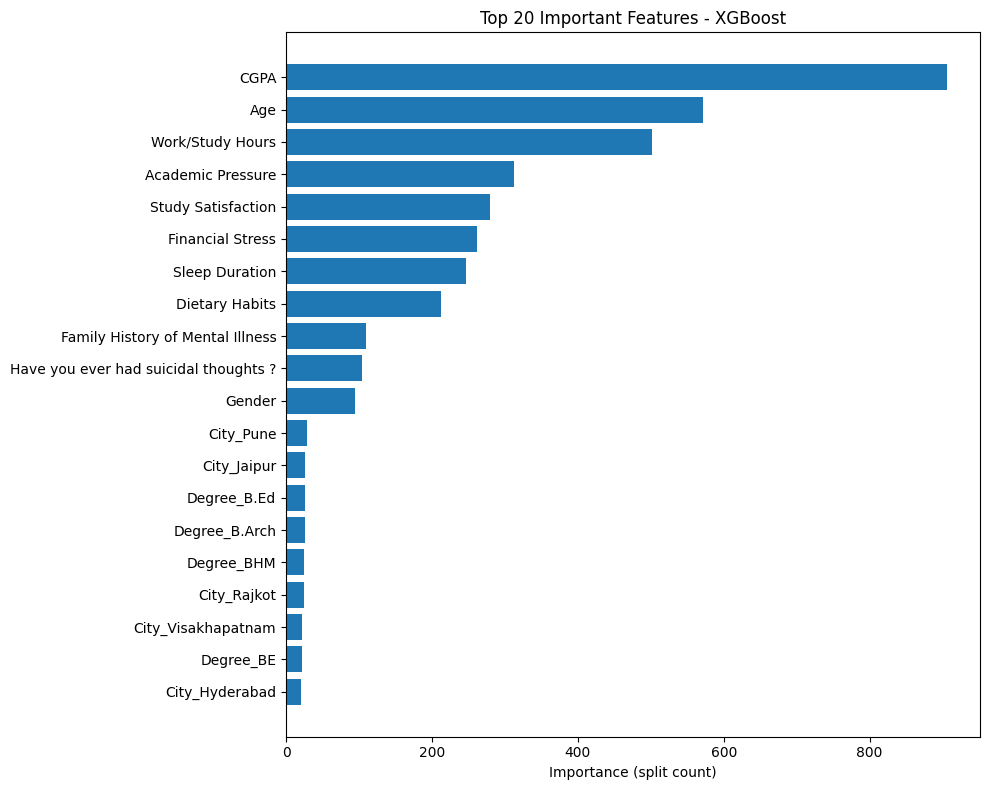

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# feature importance from the model
xgb_importance = xgb_model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame
xgb_importance_df = pd.DataFrame({
    'Feature': list(xgb_importance.keys()),
    'Importance': list(xgb_importance.values())
}).sort_values(by='Importance', ascending=False)

# Display top 20 features
print(xgb_importance_df.head(20))

# Plot top 20 features
plt.figure(figsize=(10, 8))
plt.barh(xgb_importance_df['Feature'].head(20)[::-1], xgb_importance_df['Importance'].head(20)[::-1])
plt.xlabel('Importance (split count)')
plt.title('Top 20 Important Features - XGBoost')
plt.tight_layout()
plt.show()

### **Baseline Logistic Regression**


--- Logistic Regression ---
Accuracy: 0.83730514244759
AUC Score: 0.9129711542694692
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



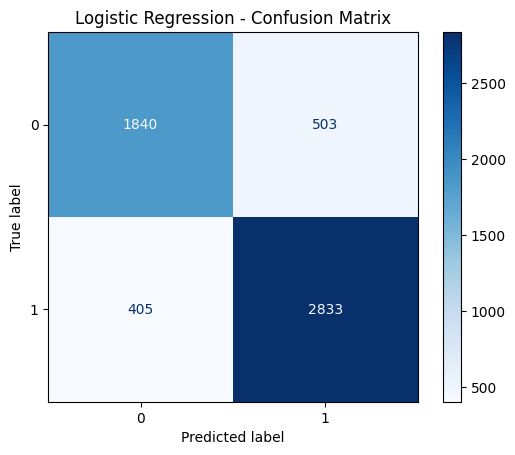

In [14]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

evaluate_model("Logistic Regression", log_model, X_test, y_test, y_pred_log, y_proba_log)

Feature importance from the model

                                   Feature  Coefficient  Importance
9    Have you ever had suicidal thoughts ?     2.561117    2.561117
76                      Profession_Student    -1.327840    1.327840
2                        Academic Pressure     0.851143    0.851143
48                             City_Nalyan    -0.628176    0.628176
33                             City_Kibara    -0.578677    0.578677
1                                      Age    -0.564926    0.564926
11                        Financial Stress     0.563872    0.563872
8                           Dietary Habits    -0.539824    0.539824
70                       Profession_Doctor     0.502874    0.502874
15                          City_Ahmedabad     0.448115    0.448115
77                      Profession_Teacher    -0.426689    0.426689
105                          Degree_Others     0.420672    0.420672
46                             City_Nagpur    -0.395462    0.395462
17                             City_Bhavna     0

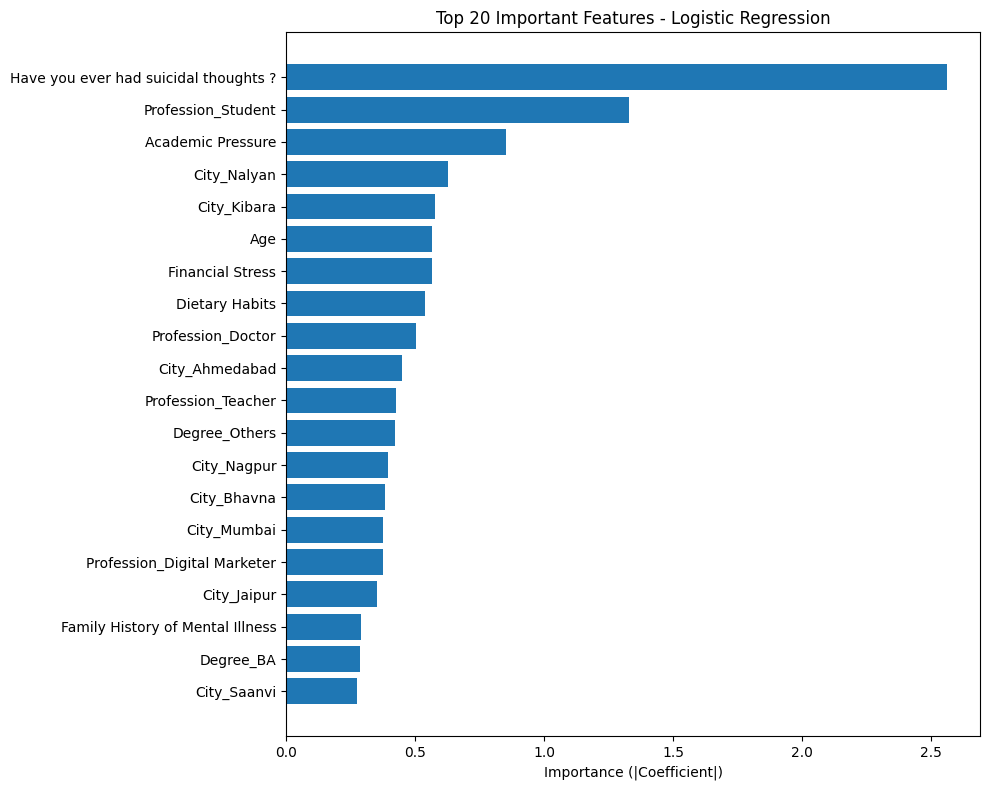

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names (after encoding)
feature_names = X_train.columns

# Get the coefficients from the trained model
coefficients = log_model.coef_[0]

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 20 features
print(importance_df.head(20))

# Plot top 20 important features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'].head(20)[::-1], importance_df['Importance'].head(20)[::-1])
plt.xlabel('Importance (|Coefficient|)')
plt.title('Top 20 Important Features - Logistic Regression')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:58:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:58:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:58:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:58:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:58:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

🔍 Stacked Model Evaluation
Accuracy: 0.8387385773158932
AUC Score: 0.9124518198716323
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



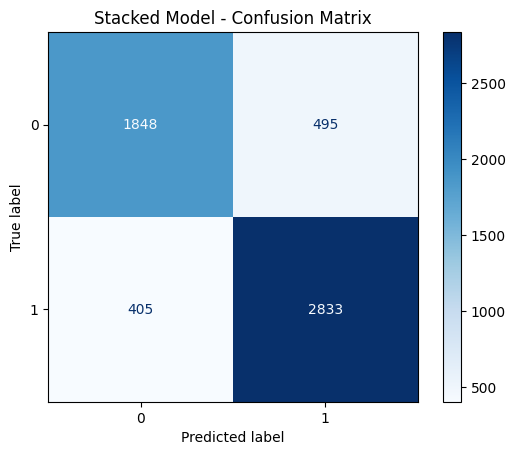

<ipython-input-16-c1beee335470>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


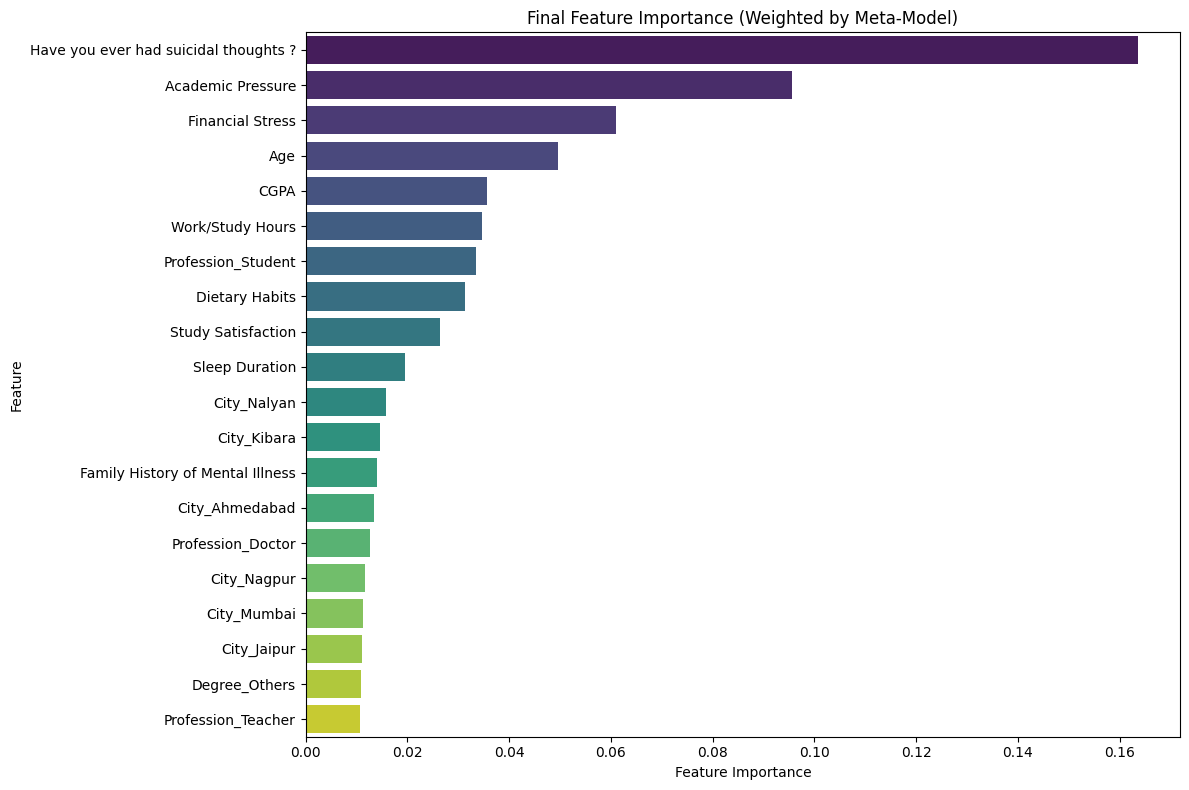

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

# Define the stacking classifier without CatBoost
stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)),
        ('logreg', LogisticRegression(max_iter=1000))
    ],
    final_estimator=LogisticRegression(),
    passthrough=False  # Set to True to include original features too
)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Predict
y_pred_stack = stack_model.predict(X_test)
y_proba_stack = stack_model.predict_proba(X_test)[:, 1]

# Evaluation
print("🔍 Stacked Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("AUC Score:", roc_auc_score(y_test, y_proba_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))

# -------------------------------
# 📌 Compute Final Feature Importance
# -------------------------------
# Get meta-model weights (Logistic Regression)
meta_weights = np.abs(stack_model.final_estimator_.coef_[0])  # Ensure positive weights
meta_weights /= np.sum(meta_weights)  # Normalize weights to sum to 1

# Get base models
base_models = {
    "rf": stack_model.named_estimators_['rf'],
    "xgb": stack_model.named_estimators_['xgb'],
    "logreg": stack_model.named_estimators_['logreg']
}

# Initialize dictionary to store feature importance
feature_importance = {}

# Extract and weight feature importance for each model
for i, (name, model) in enumerate(base_models.items()):
    if hasattr(model, "feature_importances_"):  # Tree-based models (RF, XGB)
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):  # Logistic regression
        importances = np.abs(model.coef_[0])  # Ensure positive values
    else:
        continue  # Skip models that don't provide feature importances

    # Make sure we're working with the correct feature names
    # This ensures consistent feature naming across all models
    feature_names = X_train.columns

    # Normalize feature importances for each model to sum to 1
    importances /= np.sum(importances)

    # Multiply by meta-model weight and accumulate importance
    for feature, importance in zip(feature_names, importances):
        if feature not in feature_importance:
            feature_importance[feature] = 0
        feature_importance[feature] += meta_weights[i] * importance  # Weighted sum

# Normalize final feature importances to sum to 1
total_importance = sum(feature_importance.values())
for feature in feature_importance:
    feature_importance[feature] /= total_importance

# Convert to DataFrame for visualization
feature_importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])

# Group by feature name, summing importance values (to handle any remaining duplicates)
feature_importance_df = feature_importance_df.groupby('Feature', as_index=False)['Importance'].sum()

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df=feature_importance_df.head(20)

# -------------------------------
# 📌 Plot Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, y_pred_stack)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stack_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Stacked Model - Confusion Matrix")
plt.show()

# -------------------------------
# 📌 Plot Feature Importance
# -------------------------------
plt.figure(figsize=(12, 8))  # Increased size for better readability

# Use Seaborn barplot with feature on y-axis
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')

plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Final Feature Importance (Weighted by Meta-Model)")
plt.tight_layout()  # Ensure all labels fit in the figure
plt.show()

In [17]:
print("Top 10 Features:")
print(feature_importance_df)

Top 10 Features:
                                   Feature  Importance
87   Have you ever had suicidal thoughts ?    0.163672
0                        Academic Pressure    0.095605
85                        Financial Stress    0.060959
1                                      Age    0.049525
2                                     CGPA    0.035619
106                       Work/Study Hours    0.034642
100                     Profession_Student    0.033468
83                          Dietary Habits    0.031231
104                     Study Satisfaction    0.026403
103                         Sleep Duration    0.019585
38                             City_Nalyan    0.015782
23                             City_Kibara    0.014532
84        Family History of Mental Illness    0.014035
5                           City_Ahmedabad    0.013375
94                       Profession_Doctor    0.012640
36                             City_Nagpur    0.011659
35                             City_Mumbai    0.